In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX - DATA COMPOSITION 1 (70-15-15).csv')
df.head(5)

,Month,Tourist Arrival,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,Vietnam airport,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
0,01/01/2008,399556,11,59,32,8,58,7,69,52,...,27,58,29,18,20,0,32,0,8,Train
1,01/02/2008,411032,0,51,0,0,46,6,61,35,...,27,58,31,10,19,5,39,7,5,Train
2,01/03/2008,414332,0,57,7,24,58,6,61,51,...,27,50,29,38,28,6,30,0,0,Train
3,01/04/2008,395900,0,51,6,9,58,6,66,43,...,27,41,30,25,22,8,45,0,8,Train
4,01/05/2008,366387,0,57,0,7,57,6,63,46,...,27,44,24,16,22,5,47,0,9,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(134, 22)
(26, 22)
(26, 22)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(134, 20)
(134, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(26, 20)
(26, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(26, 20)
(26, 1)


In [10]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='adam',
                  hidden_layer_sizes=10,
                  max_iter=10000,
                  learning_rate='constant',
                  shuffle=False,
                  random_state=9876,
                  activation='relu')
nn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=10, max_iter=10000, random_state=9876,
             shuffle=False)

In [ ]:
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'hidden_layer_sizes': [10,20,30,40,50],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'shuffle': [True, False]
          'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=nn, param_grid=params, cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

In [ ]:
best_params=gs.best_params_

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
y_pred=nn.predict(x_test)
print(y_pred)

[281296.52517996 296997.8965278  306314.39904852 328258.92649365
 336964.81588579 368926.80872548 395160.64421719 383527.73934118
 281595.10101836 343114.10185718 429418.74248139 547723.61362897
 602044.19142736 704045.12103864 787487.76803204 806549.51907865
 856136.92470032 884271.12560696 952971.3399152  972820.41359187
 909440.23560329 917371.6034318  895566.87069183 944441.45081699
 932192.87915976 938314.67994188]


In [13]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 331757.7014793724


In [14]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 291094.61419464205


In [15]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 3.323586150818361e+20


In [16]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 3109.671562436996


In [17]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_1653/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


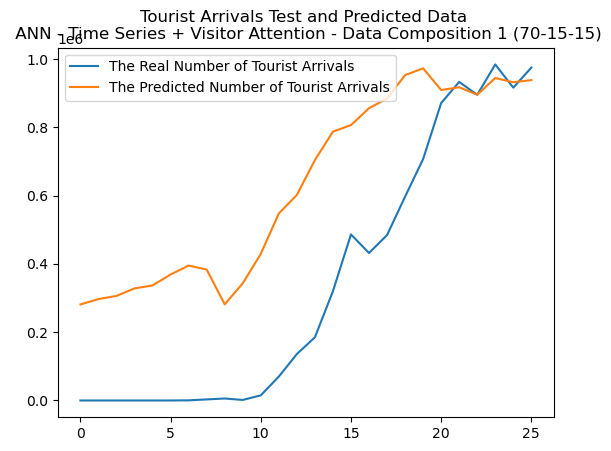

In [18]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Visitor Attention - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()